In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_PATH = r"assets/housing_data (1).csv"
data = pd.read_csv(DATA_PATH)
print(data)

      Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg       

In [7]:
columns_to_keep = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'BldgType', 'HouseStyle', 
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 
    'BsmtQual', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 
    'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
    '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'
]

data = data[columns_to_keep]

# Step 2: Rename columns for better understanding
column_rename_dict = {
    'MSSubClass': 'BuildingClass',
    'MSZoning': 'ZoneType',
    'LotFrontage': 'FrontageFeet',
    'LotArea': 'LotSizeSqFt',
    'BldgType': 'BuildingType',
    'HouseStyle': 'Style',
    'OverallQual': 'OverallQuality',
    'OverallCond': 'OverallCondition',
    'YearRemodAdd': 'YearRemodeled',
    'ExterQual': 'ExteriorQuality',
    'ExterCond': 'ExteriorCondition',
    'BsmtQual': 'BasementQuality',
    'BsmtCond': 'BasementCondition',
    'TotalBsmtSF': 'TotalBasementSqFt',
    '1stFlrSF': 'FirstFloorSqFt',
    '2ndFlrSF': 'SecondFloorSqFt',
    'GrLivArea': 'LivingAreaSqFt',
    'FullBath': 'FullBaths',
    'HalfBath': 'HalfBaths',
    'BedroomAbvGr': 'Bedrooms',
    'KitchenAbvGr': 'Kitchens',
    'KitchenQual': 'KitchenQuality',
    'TotRmsAbvGrd': 'TotalRoomsAboveGround',
    'GarageCars': 'GarageCapacity',
    'GarageArea': 'GarageSqFt',
    'WoodDeckSF': 'WoodDeckSqFt',
    'OpenPorchSF': 'OpenPorchSqFt',
    '3SsnPorch': 'ThreeSeasonPorchSqFt',
    'MoSold': 'MonthSold',
    'YrSold': 'YearSold'
}

data.rename(columns=column_rename_dict, inplace=True)

data['PricePerSqFt'] = data['SalePrice'] / data['LivingAreaSqFt']

# Age of the property
data['PropertyAge'] = data['YearSold'] - data['YearBuilt']


In [8]:
data

,BuildingClass,ZoneType,FrontageFeet,LotSizeSqFt,Neighborhood,BuildingType,Style,OverallQuality,OverallCondition,YearBuilt,...,WoodDeckSqFt,OpenPorchSqFt,EnclosedPorch,ThreeSeasonPorchSqFt,ScreenPorch,MonthSold,YearSold,SalePrice,PricePerSqFt,PropertyAge
0,SC60,RL,65,8450,CollgCr,1Fam,2Story,7,5,2003,...,0,61,0,0,0,Feb,2008,208500,121.929825,5
1,SC20,RL,80,9600,Veenker,1Fam,1Story,6,8,1976,...,298,0,0,0,0,May,2007,181500,143.819334,31
2,SC60,RL,68,11250,CollgCr,1Fam,2Story,7,5,2001,...,0,42,0,0,0,Sep,2008,223500,125.139978,7
3,SC70,RL,60,9550,Crawfor,1Fam,2Story,7,5,1915,...,0,35,272,0,0,Feb,2006,140000,81.537566,91
4,SC60,RL,84,14260,NoRidge,1Fam,2Story,8,5,2000,...,192,84,0,0,0,Dec,2008,250000,113.739763,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62,7917,Gilbert,1Fam,2Story,6,5,1999,...,0,40,0,0,0,Aug,2007,175000,106.253795,8
1456,SC20,RL,85,13175,NWAmes,1Fam,1Story,6,6,1978,...,349,0,0,0,0,Feb,2010,210000,101.302460,32
1457,SC70,RL,66,9042,Crawfor,1Fam,2Story,7,9,1941,...,0,60,0,0,0,May,2010,266500,113.888889,69
1458,SC20,RL,68,9717,NAmes,1Fam,1Story,5,6,1950,...,366,0,112,0,0,Apr,2010,142125,131.841373,60


In [9]:
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [10]:
duplicates = data.duplicated() 
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


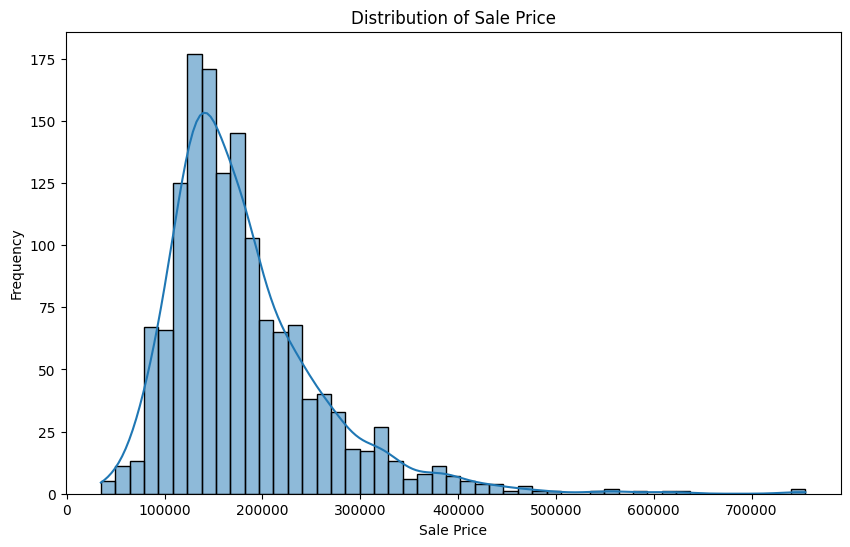

In [17]:
# Histogram for SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


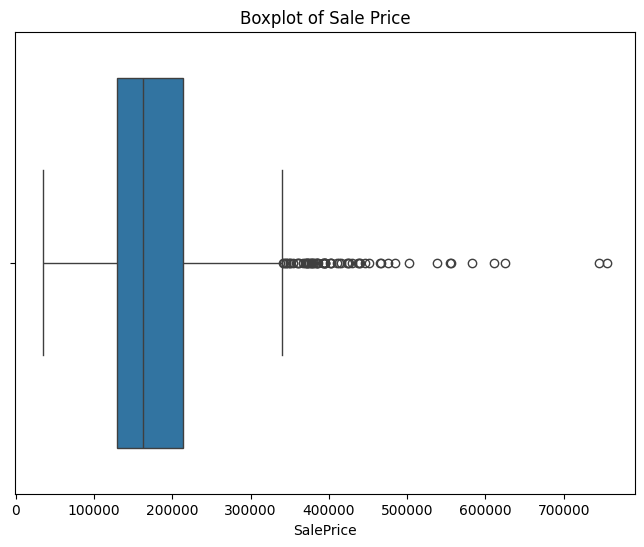

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [39]:
# Boxplot for SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['SalePrice'])
plt.title('Boxplot of Sale Price')
plt.show()

# Summary statistics for SalePrice
print(data['SalePrice'].describe())

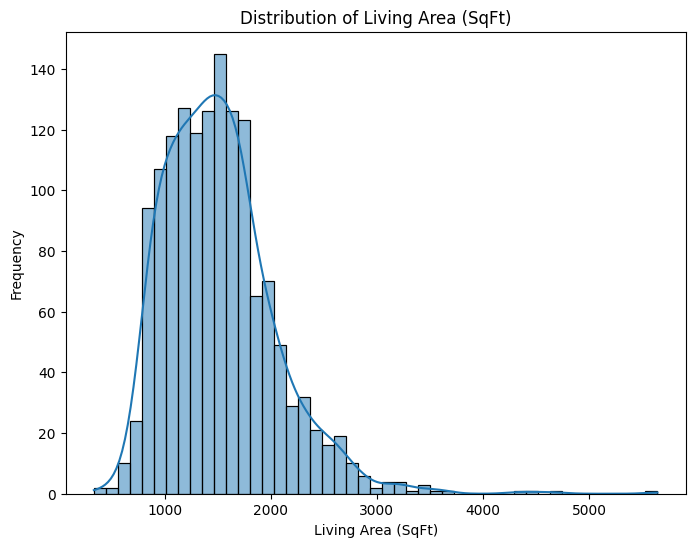

In [40]:
# Histogram for LivingAreaSqFt
plt.figure(figsize=(8, 6))
sns.histplot(data['LivingAreaSqFt'], kde=True)
plt.title('Distribution of Living Area (SqFt)')
plt.xlabel('Living Area (SqFt)')
plt.ylabel('Frequency')
plt.show()


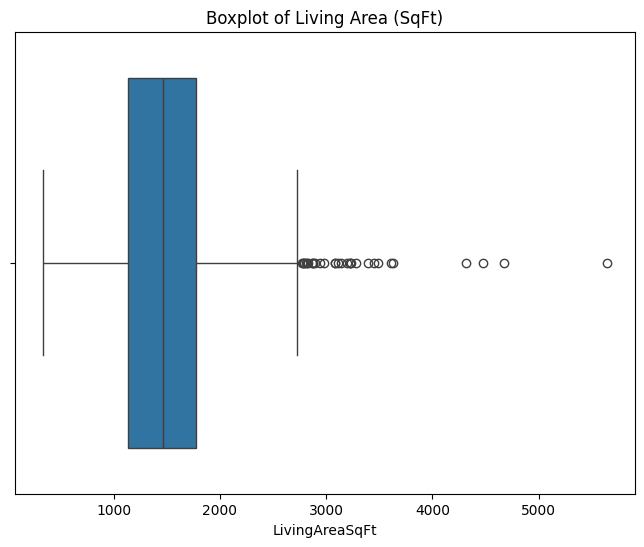

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: LivingAreaSqFt, dtype: float64


In [41]:
# Boxplot for LivingAreaSqFt
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['LivingAreaSqFt'])
plt.title('Boxplot of Living Area (SqFt)')
plt.show()

# Summary statistics for LivingAreaSqFt
print(data['LivingAreaSqFt'].describe())


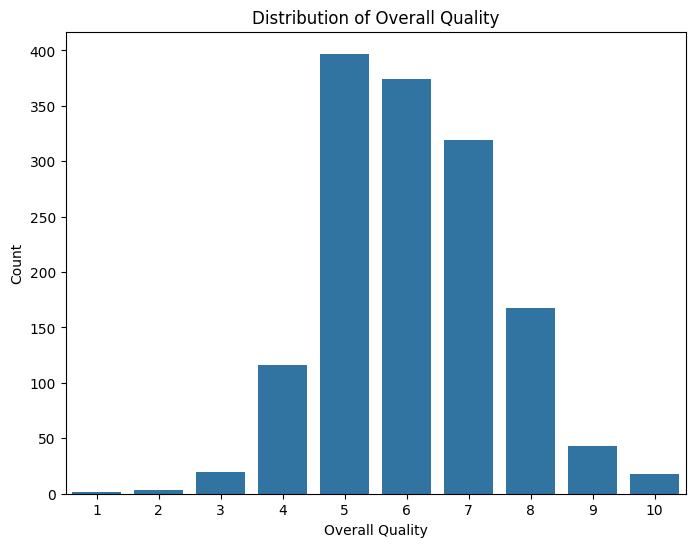

OverallQuality
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64


In [ ]:
# Bar plot for OverallQuality
plt.figure(figsize=(8, 6))
sns.countplot(x='OverallQuality', data=data)
plt.title('Distribution of Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.show()

# Value counts for OverallQuality
print(data['OverallQuality'].value_counts())


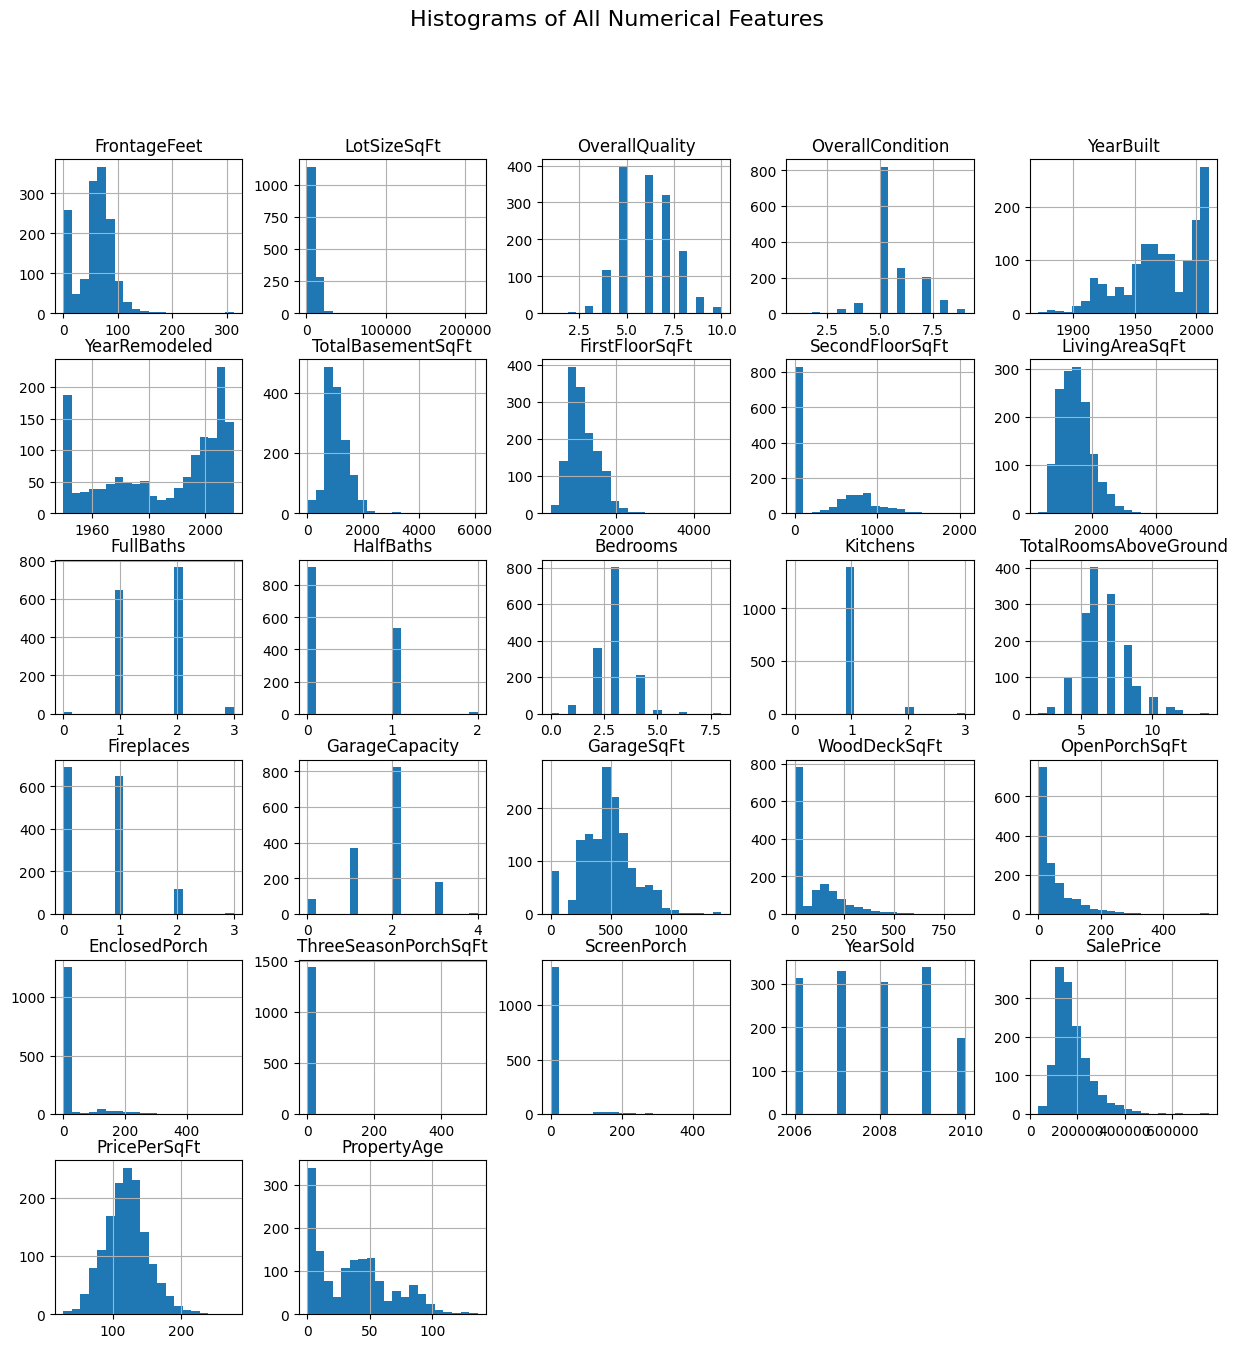

In [ ]:
# Histograms for all numerical columns
data.hist(figsize=(15, 15), bins=20)
plt.suptitle("Histograms of All Numerical Features", fontsize=16)
plt.show()


In [42]:
# Calculate skewness and kurtosis for numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
skewness = data[numerical_columns].skew()
kurtosis = data[numerical_columns].kurt()

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


Skewness:
FrontageFeet              0.267822
LotSizeSqFt              12.207688
OverallQuality            0.216944
OverallCondition          0.693067
YearBuilt                -0.613461
YearRemodeled            -0.503562
TotalBasementSqFt         1.524255
FirstFloorSqFt            1.376757
SecondFloorSqFt           0.813030
LivingAreaSqFt            1.366560
FullBaths                 0.036562
HalfBaths                 0.675897
Bedrooms                  0.211790
Kitchens                  4.488397
TotalRoomsAboveGround     0.676341
Fireplaces                0.649565
GarageCapacity           -0.342549
GarageSqFt                0.179981
WoodDeckSqFt              1.541376
OpenPorchSqFt             2.364342
EnclosedPorch             3.089872
ThreeSeasonPorchSqFt     10.304342
ScreenPorch               4.122214
YearSold                  0.096269
SalePrice                 1.882876
PricePerSqFt              0.375917
PropertyAge               0.609030
dtype: float64

Kurtosis:
FrontageFeet       

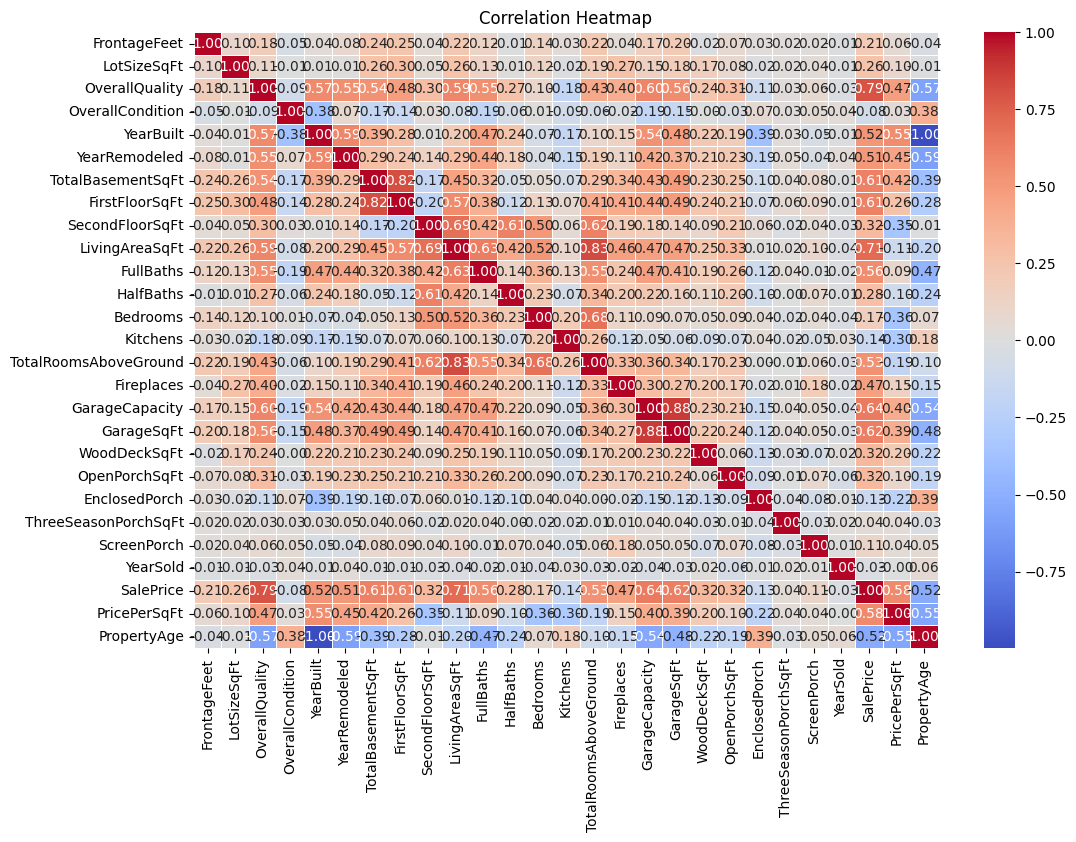

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Correlation heatmap
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

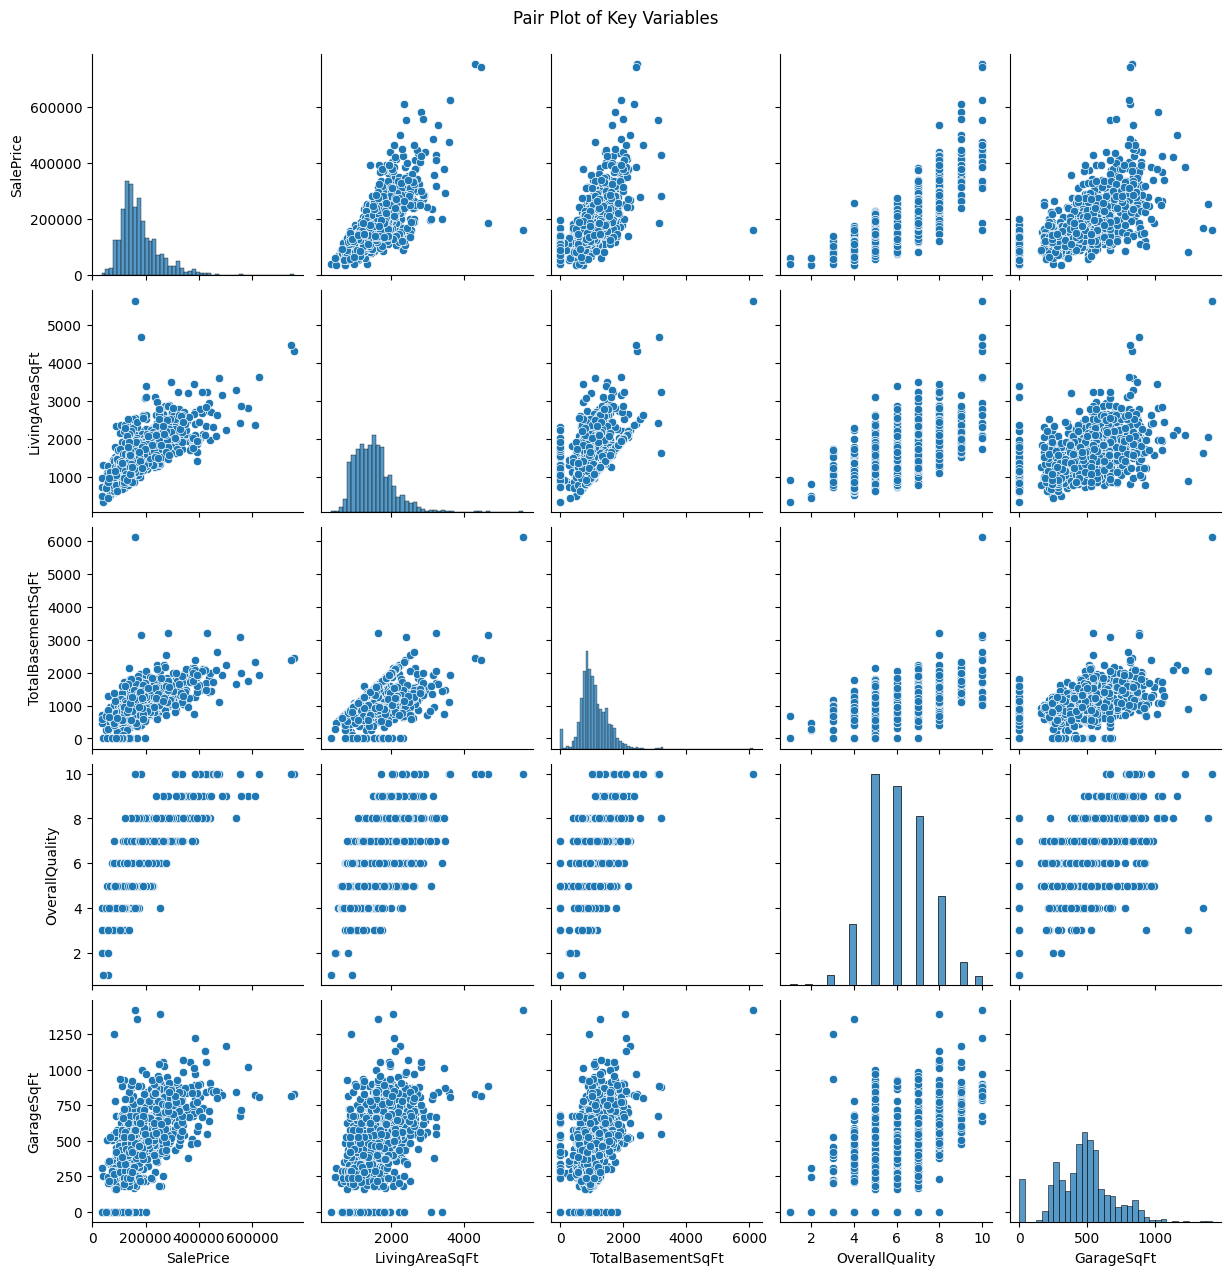

In [45]:

# Pair plot for selected features
sns.pairplot(data, vars=['SalePrice', 'LivingAreaSqFt', 'TotalBasementSqFt', 'OverallQuality', 'GarageSqFt'])
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()


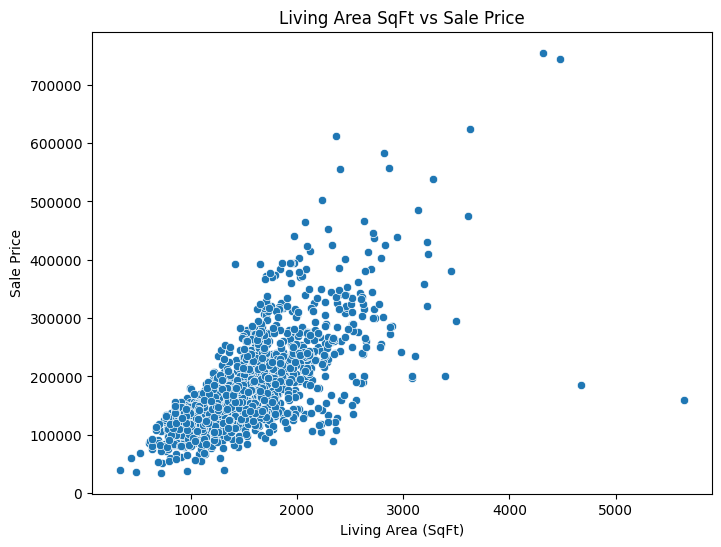

In [ ]:

# Scatter plot: Living Area SqFt vs Sale Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LivingAreaSqFt', y='SalePrice', data=data)
plt.title('Living Area SqFt vs Sale Price')
plt.xlabel('Living Area (SqFt)')
plt.ylabel('Sale Price')
plt.show()


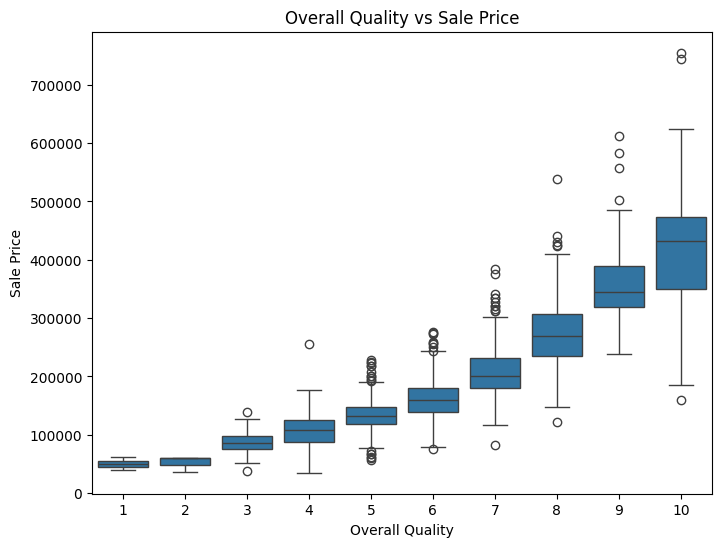

In [ ]:

# Box plot: Overall Quality vs Sale Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQuality', y='SalePrice', data=data)
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()


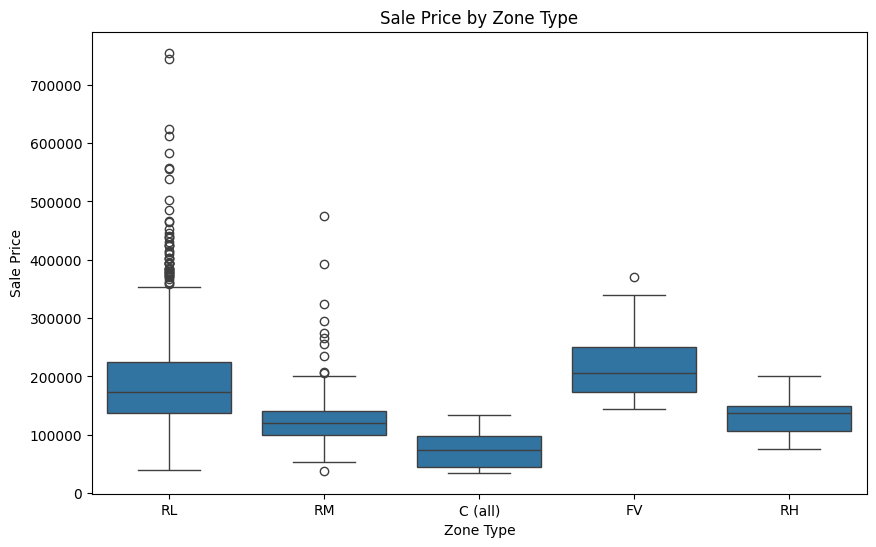

In [46]:

# Box plot of Sale Price by ZoneType
plt.figure(figsize=(10, 6))
sns.boxplot(x='ZoneType', y='SalePrice', data=data)
plt.title('Sale Price by Zone Type')
plt.xlabel('Zone Type')
plt.ylabel('Sale Price')
plt.show()


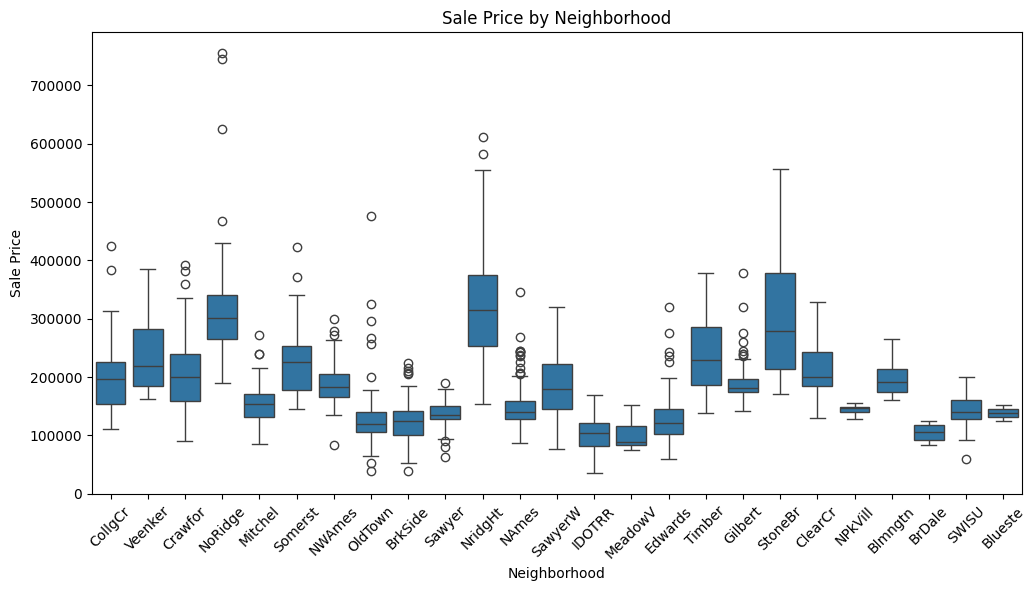

In [47]:

# Box plot: Sale Price by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.xticks(rotation=45)
plt.title('Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.show()


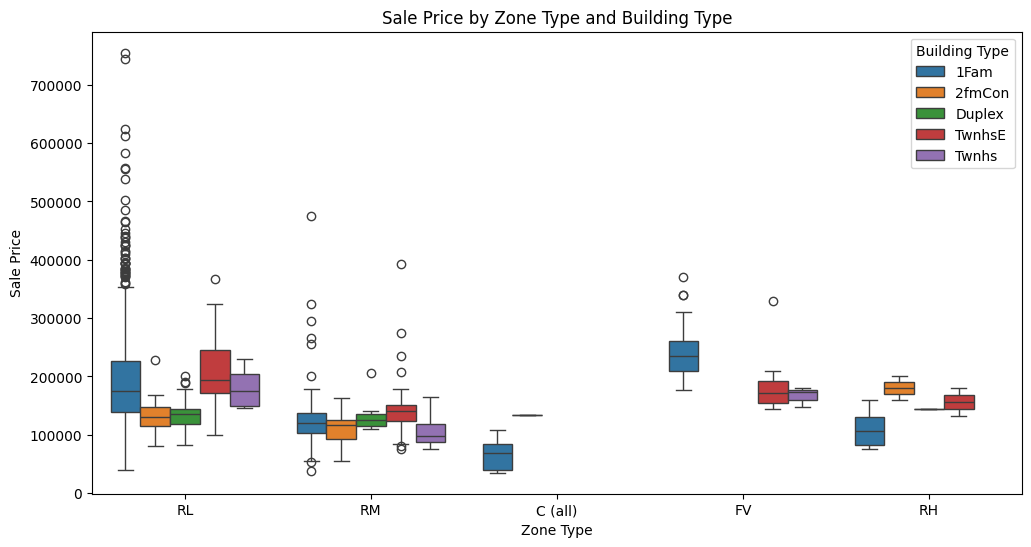

In [48]:

# Sale Price by ZoneType and BuildingType
plt.figure(figsize=(12, 6))
sns.boxplot(x='ZoneType', y='SalePrice', hue='BuildingType', data=data)
plt.title('Sale Price by Zone Type and Building Type')
plt.xlabel('Zone Type')
plt.ylabel('Sale Price')
plt.legend(title='Building Type')
plt.show()



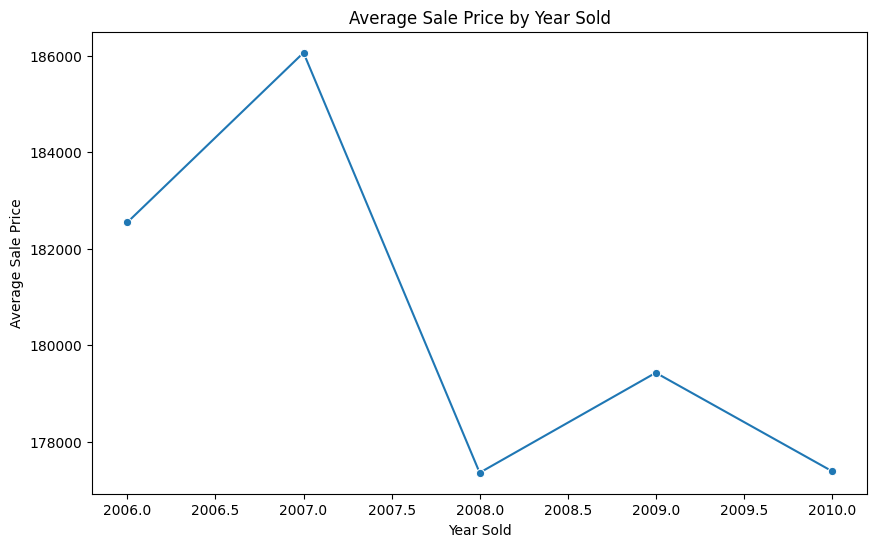

In [ ]:
# Average SalePrice by YearSold
yearly_sales = data.groupby('YearSold')['SalePrice'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearSold', y='SalePrice', data=yearly_sales, marker='o')
plt.title('Average Sale Price by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.show()



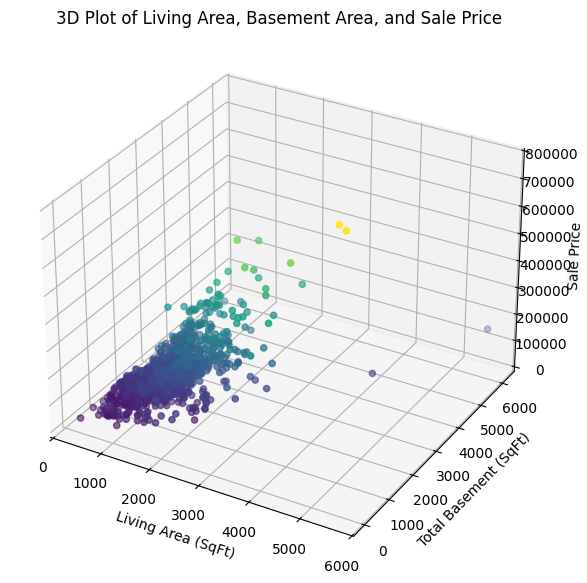

In [ ]:
# 3D Scatter Plot of Living Area, Basement Area, and Sale Price
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['LivingAreaSqFt'], data['TotalBasementSqFt'], data['SalePrice'], c=data['SalePrice'], cmap='viridis')
ax.set_xlabel('Living Area (SqFt)')
ax.set_ylabel('Total Basement (SqFt)')
ax.set_zlabel('Sale Price')
plt.title("3D Plot of Living Area, Basement Area, and Sale Price")
plt.show()

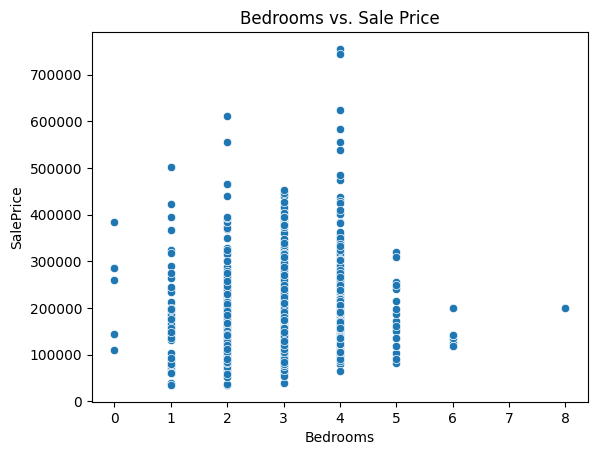

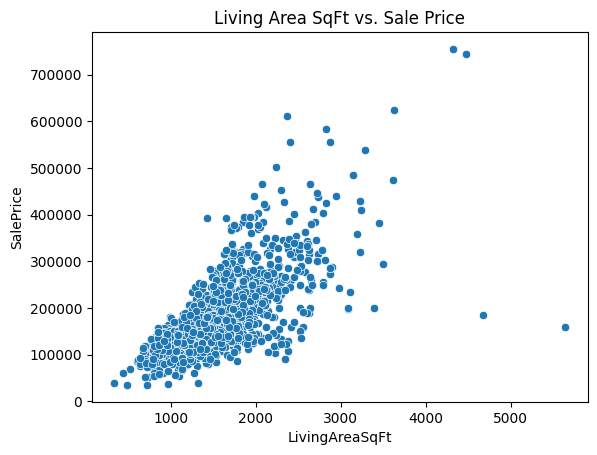

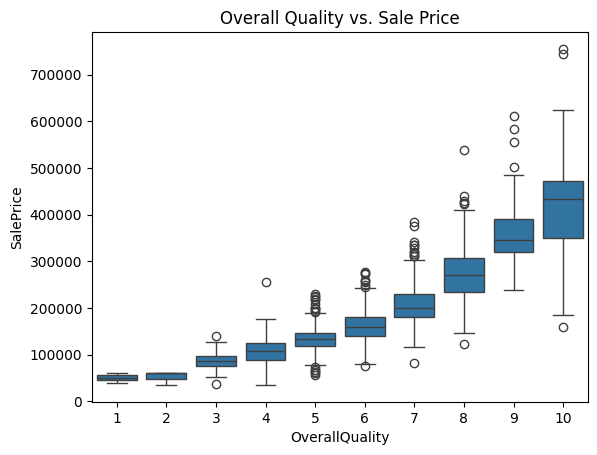

In [ ]:
sns.scatterplot(x='Bedrooms', y='SalePrice', data=data)
plt.title('Bedrooms vs. Sale Price')
plt.show()

sns.scatterplot(x='LivingAreaSqFt', y='SalePrice', data=data)
plt.title('Living Area SqFt vs. Sale Price')
plt.show()

sns.boxplot(x='OverallQuality', y='SalePrice', data=data)
plt.title('Overall Quality vs. Sale Price')
plt.show()